# Report - Blood Pressure Monitoring
Measurements between 15.07.2017 - #FIXME

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
import seaborn as sns

%matplotlib inline
fig_size = [16, 7]
plt.rcParams["figure.figsize"] = fig_size

In [31]:
# Load data
filepath = "data/data.csv"
raw_data = pd.read_csv(filepath, parse_dates=[["Date", "Time"]])

# FIXME maybe cleaning (datetime)
data = raw_data.set_index(pd.DatetimeIndex(raw_data.Date_Time)).drop("Date_Time", axis=1)
data.head()

,Sys,Dia,Pulse
Date_Time,,,
2017-07-15 09:16:00,148,84,57
2017-07-15 19:24:00,159,92,75
2017-07-15 22:23:00,123,83,77
2017-07-16 09:14:00,124,81,68
2017-07-16 15:16:00,121,79,70


### Blood Pressure & Pulse Values
Visualization

In [141]:
# Plot Util 

def make_week_plot(df):
    """ Creates plot object of weekly pressure and pulse values
    :Param df: pd.Dataframe of pressure and pulse values per week
    :Return plt: Pyplot object
    """
    sns.set_style("darkgrid")
    fig, ax = plt.subplots()

    for ix, row in df.iterrows():
        # Pulse point marker
        pulse_plot, = ax.plot(ix, row.Pulse, 
                             marker="D", color="m", linestyle = "None", label="Pulse")
        # Sys point marker
        sys_plot, = ax.plot(ix, row.Sys,
                           marker="v", color="b", linestyle = "None", label="Systolic")
        # Dia point marker
        dia_plot, = ax.plot(ix, row.Dia,
                           marker="^", color="b", linestyle = "None", label="Diastolic")
        # Vertical line between points
        vert_plot = ax.axvline(x=ix, ymin=row.Dia/200, ymax=row.Sys/200, 
                               color="b")

    # X Axis enhancements
    ax.xaxis.set_minor_locator(mdates.DayLocator())
    ax.xaxis.set_minor_formatter(mdates.DateFormatter("\n\n\n\n%d\n%a"))
    ax.xaxis.grid(True, which="minor")
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
    plt.xticks(rotation=270)

    # Y Axis enhancements
    plt.yticks(range(0, 201, 20))

    # Legend
    legend = plt.legend([sys_plot, dia_plot, pulse_plot], ["Systolic", "Diastolic", "Pulse"], 
                        markerscale=1.6, frameon=True, fontsize=13)
    frame = legend.get_frame()
    frame.set_color("w")
    
    # Layout
    plt.tight_layout()
    
    return plt


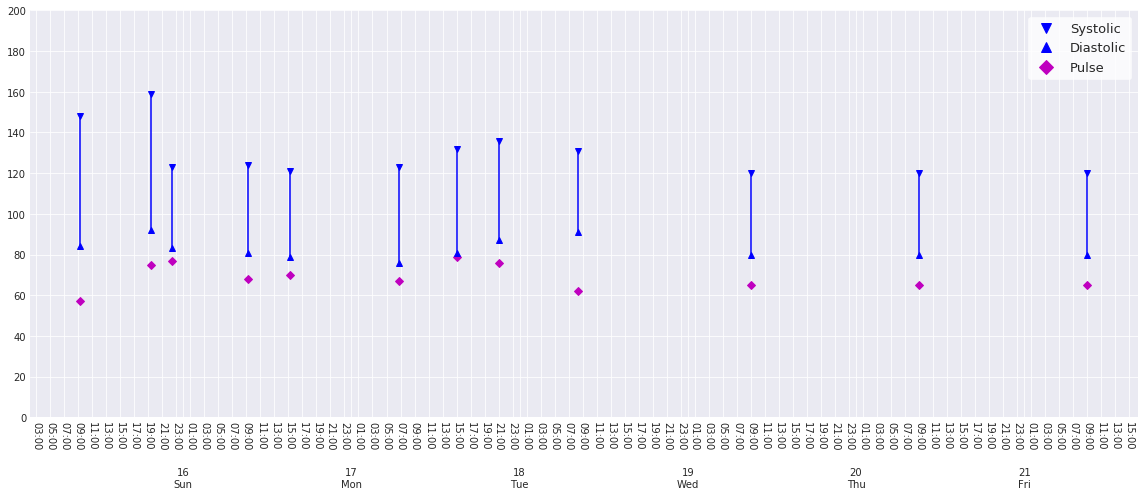

In [143]:
#FIXME plot per week
p = make_week_plot(data)
p.show()

#### Metrices

In [137]:
# Metrices Utils

def make_metrices_dict(df):
    """ Creates dict of standard metrices and corresponding values
    :Param data: pd.Dataframe of pressure values
    :Return metrices dict: dict with metrices and processed values 
    """
    metrices_dict = {}

    #mean
    metrices_dict["Systolic mean"] = "{0:.2f}".format(df.Sys.mean())
    metrices_dict["Diastolic mean"] = "{0:.2f}".format(df.Dia.mean())

    #sys max min
    metrices_dict["Systolic max"] = df.Sys.max()
    metrices_dict["Systolic min"] = df.Sys.min()

    #dia max min
    metrices_dict["Diastolic max"] = df.Dia.max()
    metrices_dict["Diastolic min"] = df.Dia.min()
    
    #count of high / low blood pressure measures
    metrices_dict["High Pressure Measures"] = df[(df.Sys > 139) | (df.Dia > 89)].count()[0]
    metrices_dict["Low Pressure Measures"] = df[(df.Sys < 100) | (df.Dia < 60)].count()[0]
    
    return metrices_dict


Total

In [138]:
# Metrices Total

metrices_total = make_metrices_dict(data)

metrices_table_total = pd.DataFrame.from_dict(metrices_total, orient="index").rename(columns={0: "Value"})
metrices_table_total

,Value
Systolic mean,129.75
Diastolic mean,82.83
Systolic max,159
Systolic min,120
Diastolic max,92
Diastolic min,76
High Pressure Measures,3
Low Pressure Measures,0


Per Day

In [ ]:
#mean per day
#FIXME rolling | subset per day

### Data Table

In [139]:
# Data table
data_table = data
data_table.index.rename("ToM", inplace=True)

data_table

,Sys,Dia,Pulse
ToM,,,
2017-07-15 09:16:00,148,84,57
2017-07-15 19:24:00,159,92,75
2017-07-15 22:23:00,123,83,77
2017-07-16 09:14:00,124,81,68
2017-07-16 15:16:00,121,79,70
2017-07-17 06:45:00,123,76,67
2017-07-17 15:04:00,132,81,79
2017-07-17 21:00:00,136,87,76
2017-07-18 08:20:00,131,91,62
